In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# modify the path below accordingly
PATH = "/content/drive/MyDrive/compvision/gesture_face_features"

In [3]:
!pip install mediapipe

In [4]:
# importing .py files from /code
import sys
import os
sys.path.append(os.path.join(PATH, "code"))

%load_ext autoreload
%autoreload 2

from utils import *
from config import Config, available_models
from heatmap import Heatmap
from hand_extraction import extract_hand_mp

from copy import deepcopy

In [5]:
configs = {}
img_type="both"
letter = None
is_random = True
first_model = available_models[next(iter(available_models))]

for model_name in available_models.values():
  print("Configuring model", model_name, "for", img_type, "images, for letter", letter)
  load_data = model_name == first_model # Loading data only for the first model
  conf = Config(PATH, img_type=img_type, letter=letter, model_name=model_name, load_data=load_data, is_random=is_random)
  if not load_data:
    conf.imgs = deepcopy(configs[first_model].imgs)
    conf.heatmap_config[7] = conf.imgs
  configs[model_name] = conf
  print()

orig_imgs = deepcopy(configs[first_model].imgs)

Configuring model ResNet50 for both images, for letter None
Loading data...
Data loaded successfully.
Setting up model ResNet50...
Model was set up successfully.

Configuring model InceptionV3 for both images, for letter None
Setting up model InceptionV3...
Model was set up successfully.

Configuring model EfficientNetB0 for both images, for letter None
Setting up model EfficientNetB0...
Model was set up successfully.

Configuring model EfficientNetB1 for both images, for letter None
Setting up model EfficientNetB1...
Model was set up successfully.

Configuring model EfficientNetB6 for both images, for letter None
Setting up model EfficientNetB6...
Model was set up successfully.



1/1 [==============================] - 0s 200ms/step


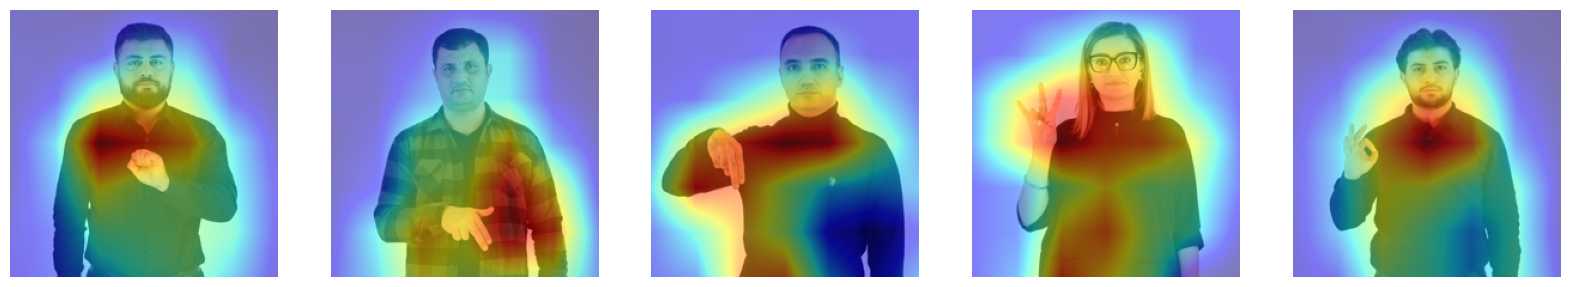

1/1 [==============================] - 0s 197ms/step


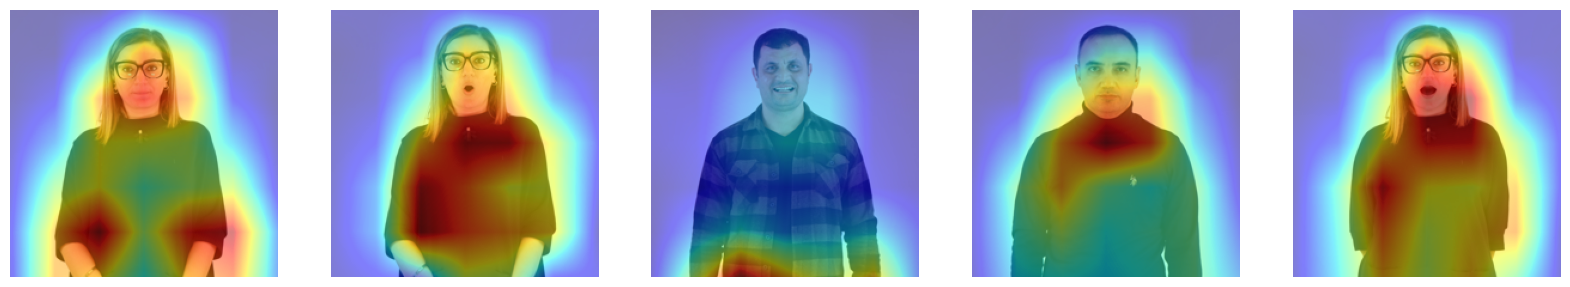

In [7]:
conf = configs['ResNet50']
hm = Heatmap(*conf.heatmap_config)
# hm.generate_heatmaps(save=True)
# hm.load_heatmaps()
hm.generate_heatmaps_row(img_count=5, imgs_per_row=5)

1/1 [==============================] - 0s 188ms/step


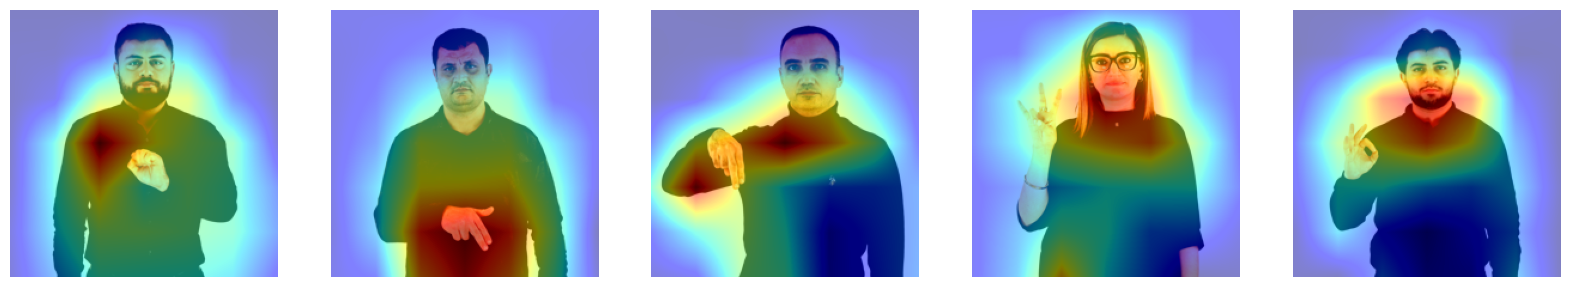

1/1 [==============================] - 0s 180ms/step


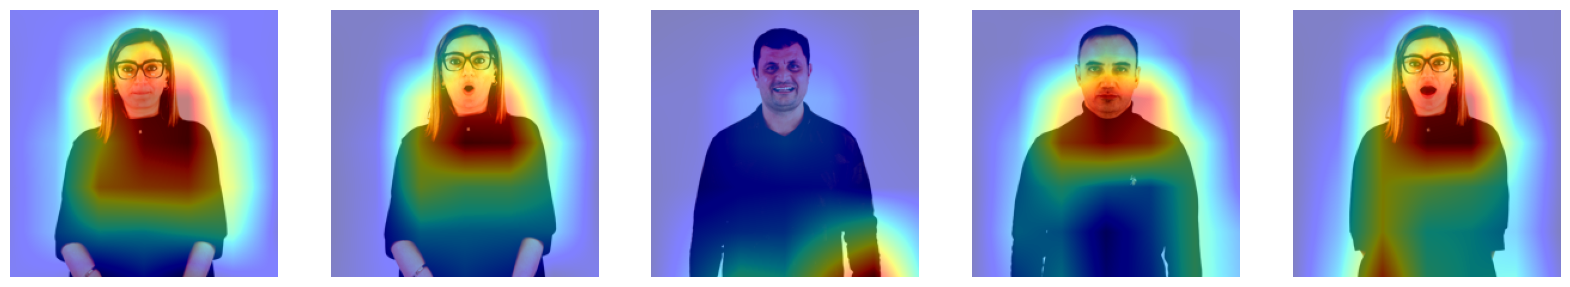

In [12]:
factor = 2

contrasted_sign = adjust_contrasts(conf.imgs["sign"], factor)
contrasted_face = adjust_contrasts(conf.imgs["face"], factor)

conf.imgs["sign"] = contrasted_sign
conf.imgs["face"] = contrasted_face

# conf.imgs["sign"] = orig_imgs["sign"]
# conf.imgs["face"] = orig_imgs["face"]

hm.generate_heatmaps_row(img_count=5, imgs_per_row=5)

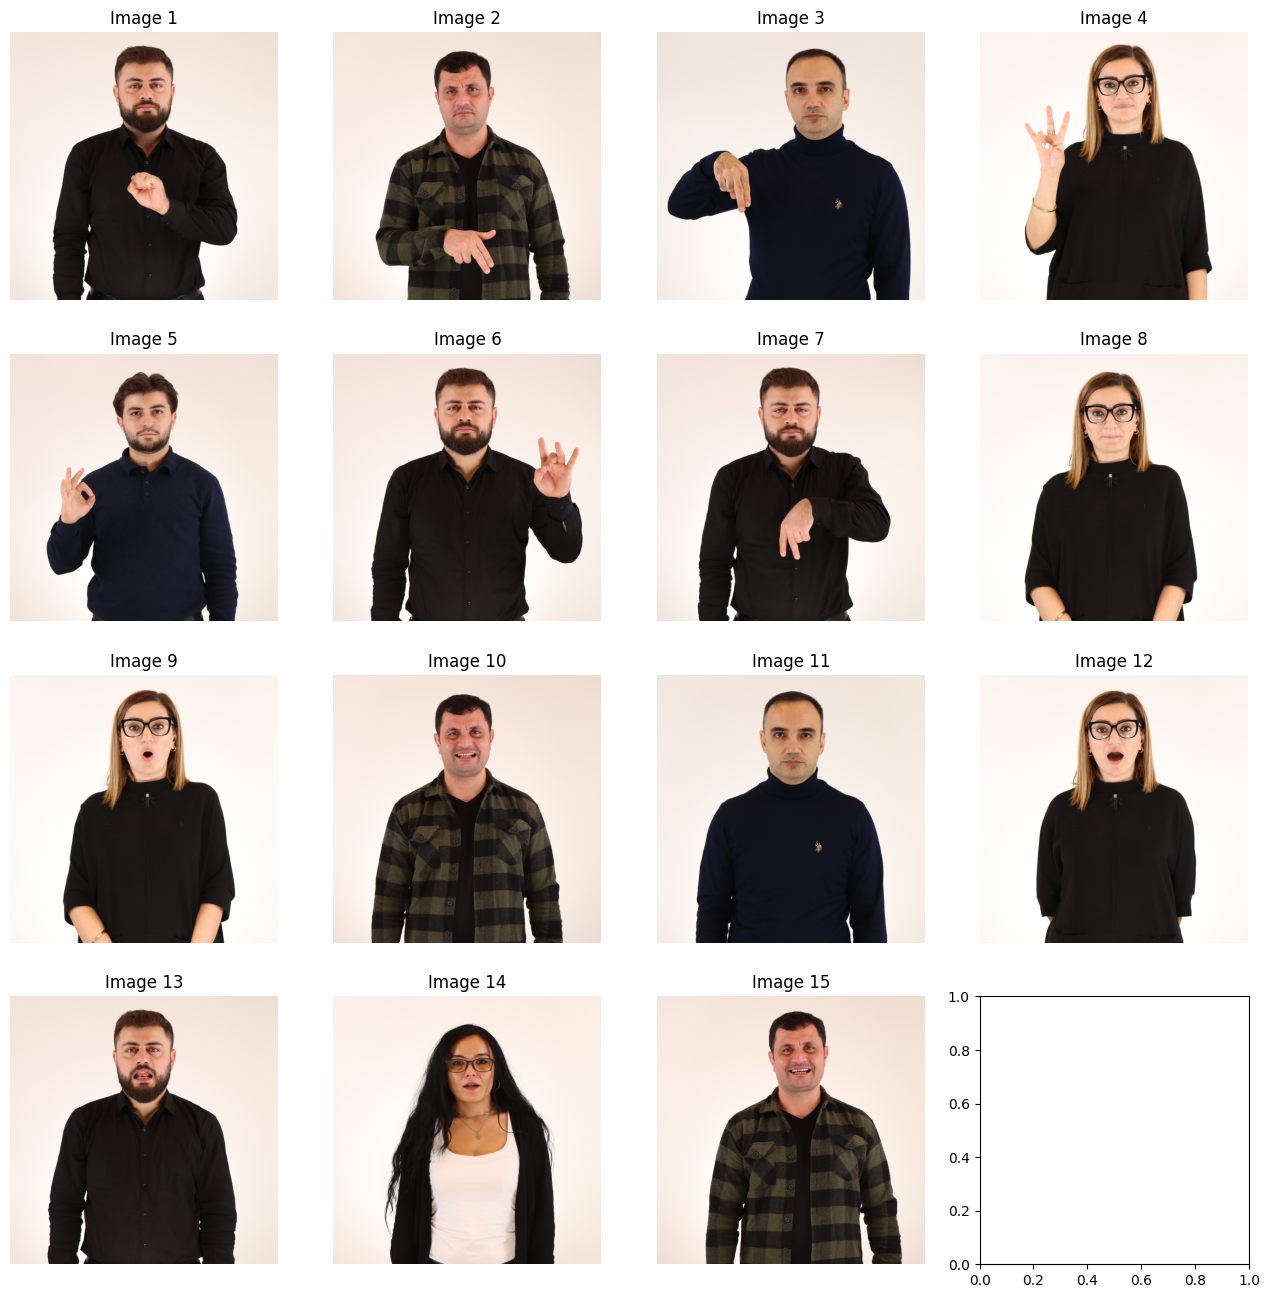

In [9]:
plot_imgs(orig_imgs["both"], 4)

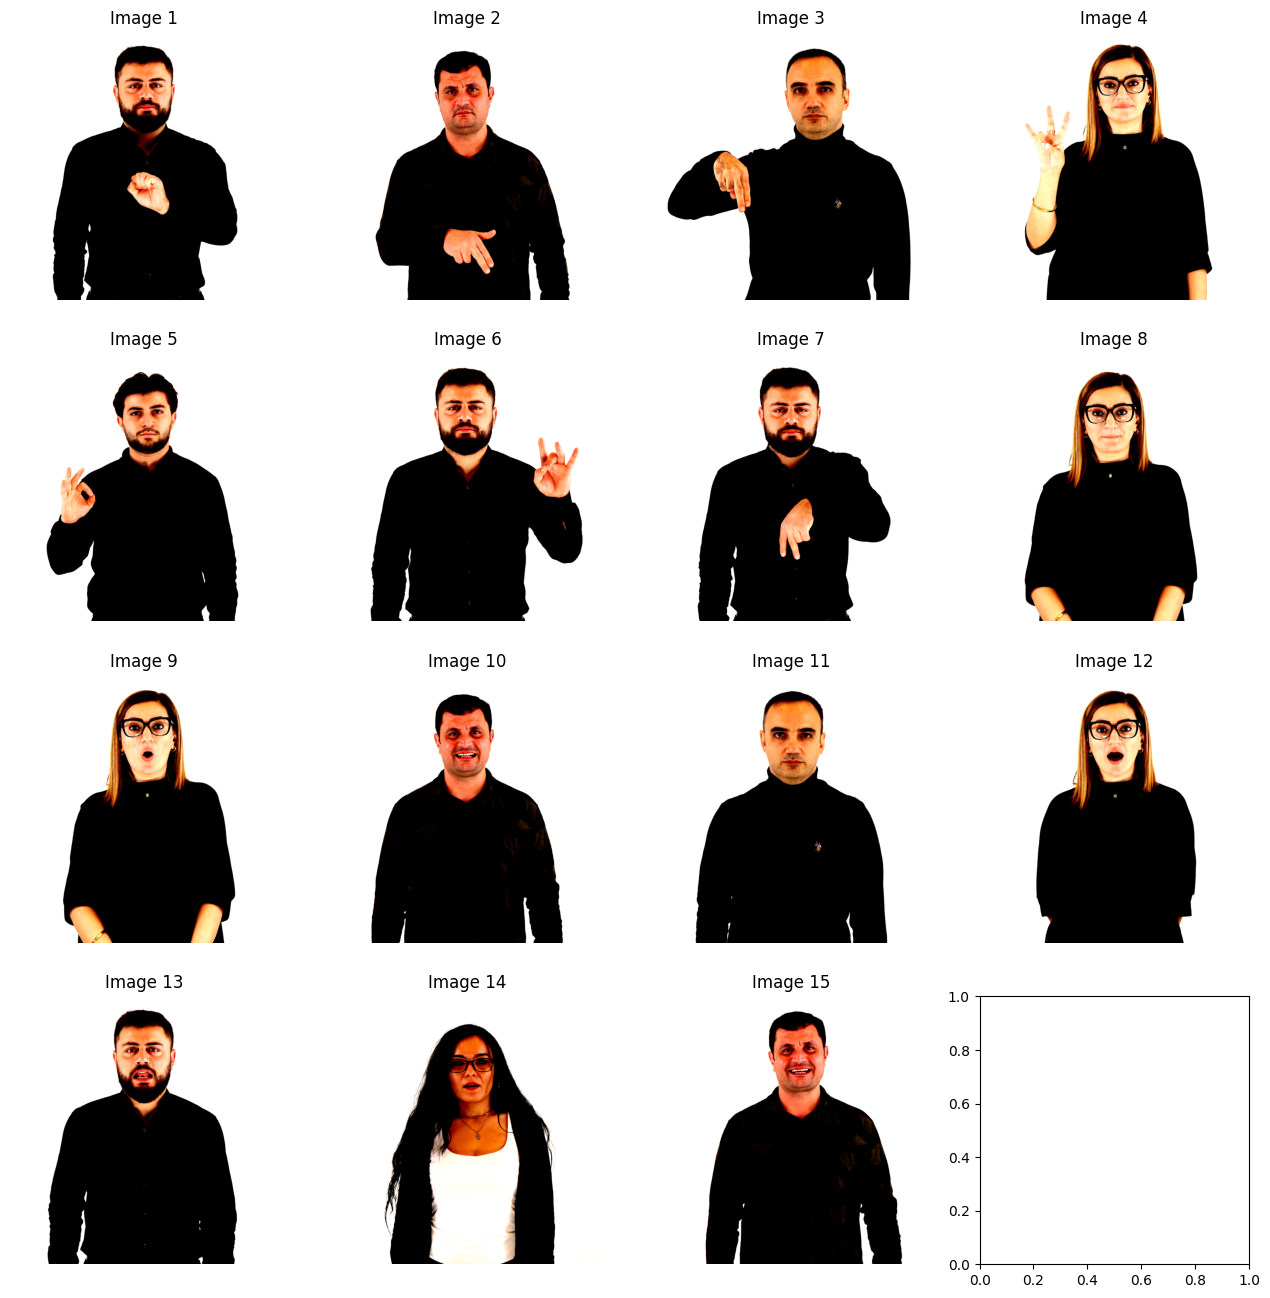

In [10]:
plot_imgs(contrasted, 4)

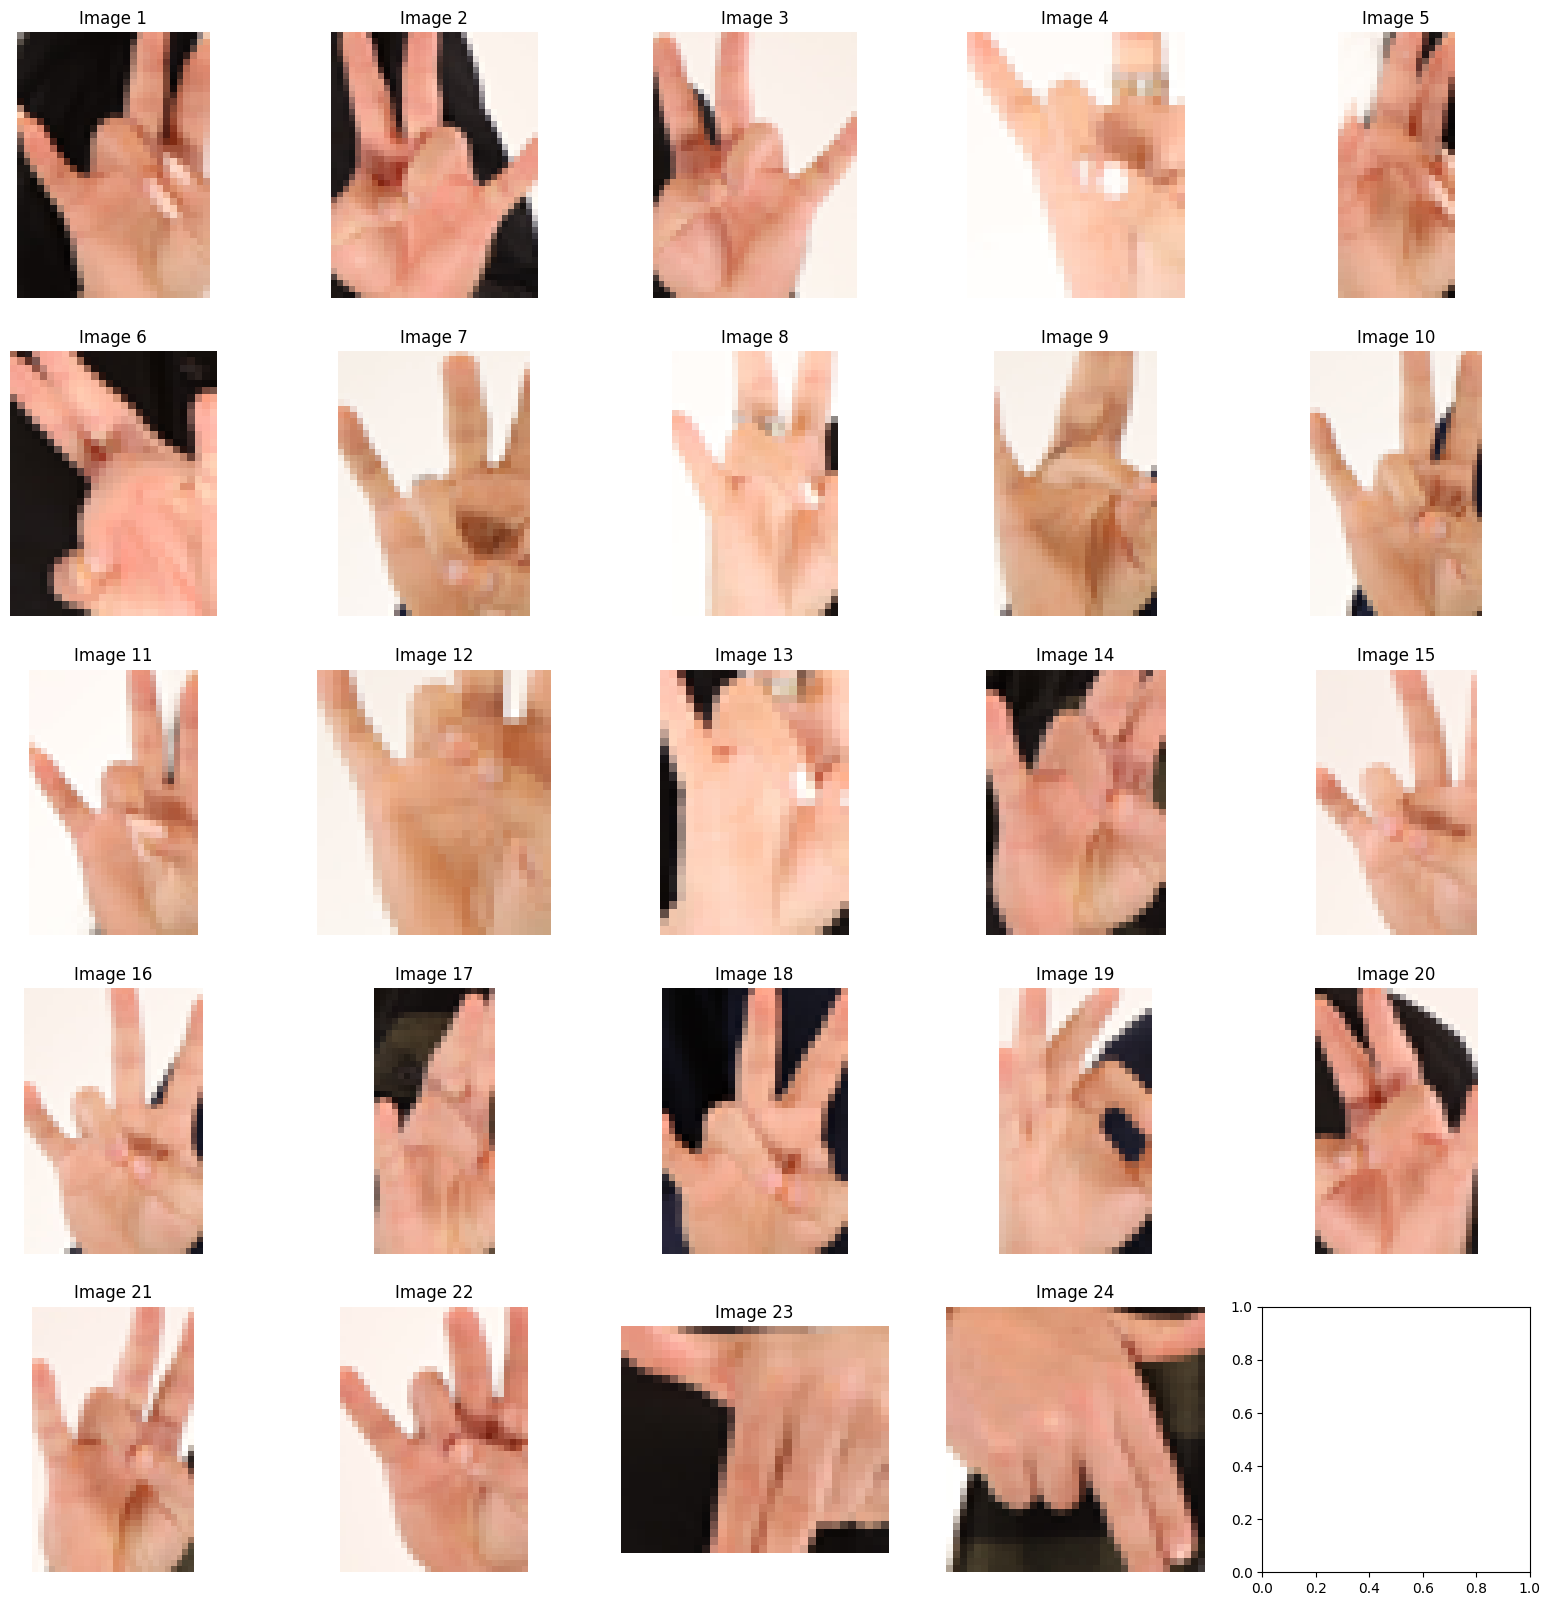

In [11]:
hand_path = os.path.join(PATH, "cropped_hands")
# input_dim = (224, 224)
# extract_hand_mp(conf.imgs["sign"], input_dim, output_path=hand_path)
plot_imgs(hand_path, imgs_per_row=5)